# Title

In [11]:
# Import standard Python Libraries needed
import folium
import geopandas as gpd
import json
from keplergl import KeplerGl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal
import seaborn as sns

# configs for kepler maps
import config

%matplotlib inline

## Heating and Cooling End Use Analysis

In [2]:
buildings = pd.read_excel('./processed_data/fullNoMorph.xlsx')

buildings

,BLDGID,area_total,elec_per_area_total,elec_total,Total Building Area Area [m2],Net Conditioned Building Area Area [m2],Heating Electricity [GJ],Heating Natural Gas [GJ],Cooling Electricity [GJ],Interior Lighting Electricity [GJ],...,Heating + Cooling [GJ],Heating + Cooling + Fans [GJ],Net Heating + Fans [GJ],% Heating (Heating and Cooling Only),% Cooling (Heating and Cooling Only),% Heating (All Energy Use),% Cooling + Fans (All Energy Use),"% Cooling + Fans (Heating Cooling, and Fans Only)","% Heating (Heating Cooling, and Fans Only)",Ratio Heating/Cooling
0,1,285.41,908.69,259.35,285.41,285.41,78.40,4.86,10.22,26.59,...,93.48,96.36,86.14,0.890672,0.109328,0.273450,0.043024,0.135949,0.864051,8.146771
1,2,313.14,942.95,295.28,313.14,313.14,104.53,3.22,13.15,29.18,...,120.90,124.72,111.57,0.891232,0.108768,0.318062,0.050093,0.136065,0.863935,8.193916
2,4,251.16,1207.21,303.20,251.16,251.16,122.96,0.80,15.26,23.40,...,139.02,143.47,128.21,0.890232,0.109768,0.359485,0.057252,0.137381,0.862619,8.110092
3,5,288.21,1146.20,330.35,288.21,288.21,139.65,0.95,17.20,26.85,...,157.80,162.84,145.64,0.891001,0.108999,0.378394,0.059854,0.136576,0.863424,8.174419
4,10,282.49,1255.94,354.79,282.49,282.49,167.71,0.25,12.66,26.32,...,180.62,187.82,175.16,0.929908,0.070092,0.424882,0.050239,0.105740,0.894260,13.266983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,16526,23135.86,369.43,8547.09,23135.86,23135.86,0.00,6492.39,303.72,2202.09,...,6796.11,6985.25,6681.53,0.955310,0.044690,0.429196,0.032582,0.070557,0.929443,21.376235
314,16941,21757.03,358.45,7798.86,21757.03,21757.03,2451.46,1116.84,408.21,2027.13,...,3976.51,4160.64,3752.43,0.897345,0.102655,0.391176,0.064935,0.142368,0.857632,8.741334
315,16953,48278.80,304.17,14685.02,48278.80,48278.80,0.00,10106.76,513.39,4595.21,...,10620.15,10900.56,10387.17,0.951659,0.048341,0.406234,0.031906,0.072822,0.927178,19.686320
316,17163,11660.55,484.14,5645.33,11660.55,11660.55,0.00,3839.10,174.62,1109.86,...,4013.72,4092.19,3917.57,0.956494,0.043506,0.401084,0.026441,0.061847,0.938153,21.985454


In [3]:
avg_ratio_heating_to_cooling = buildings['Ratio Heating/Cooling'].mean()

avg_ratio_heating_to_cooling

15.350650377171883

In [4]:
sns.set(font_scale=1.6)

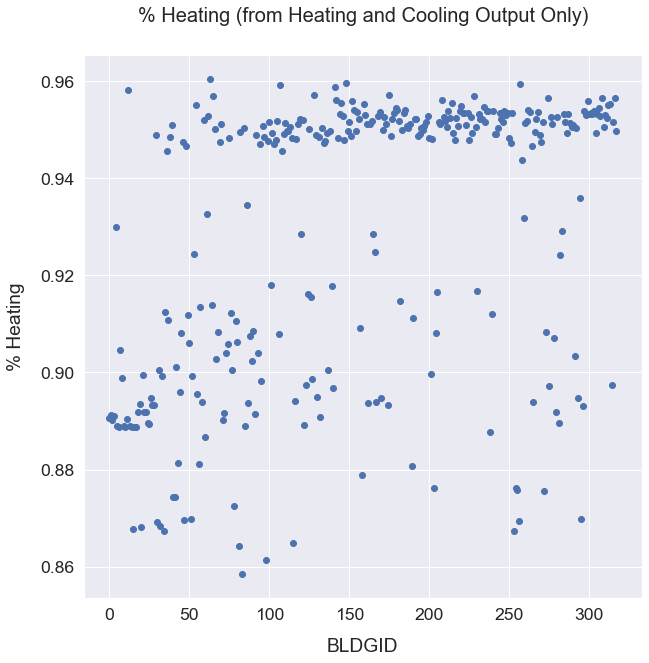

In [5]:
fig1 = plt.figure(figsize=(10,10))
plt.scatter(buildings.index, buildings['% Heating (Heating and Cooling Only)'])
plt.title('% Heating (from Heating and Cooling Output Only)',fontsize=20, y=1.05)
plt.xlabel('BLDGID', labelpad=15)
plt.ylabel('% Heating', labelpad=15)
plt.show()

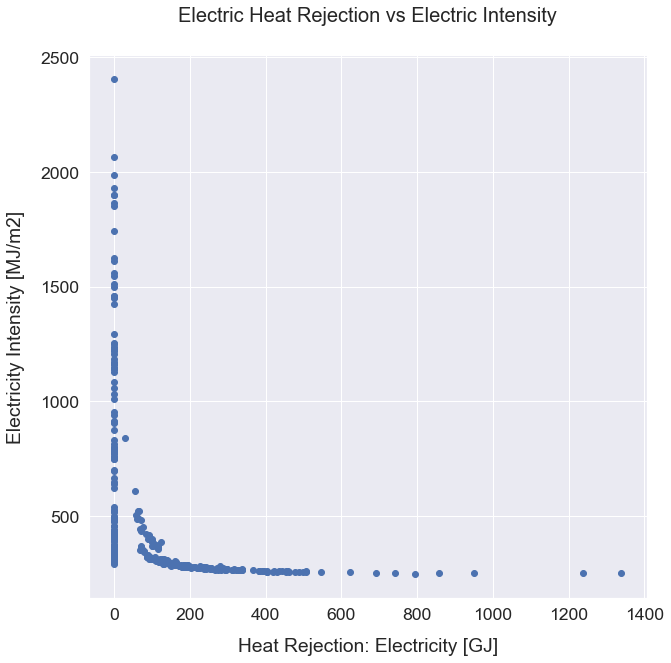

In [6]:
fig2 = plt.figure(figsize=(10,10))
plt.scatter(buildings['Heat Rejection Electricity [GJ]'], buildings['Total Electricity Intensity [MJ/m2]'])
plt.title('Electric Heat Rejection vs Electric Intensity',fontsize=20, y=1.05)
plt.xlabel('Heat Rejection: Electricity [GJ]', labelpad=15)
plt.ylabel('Electricity Intensity [MJ/m2]', labelpad=15)
plt.show()

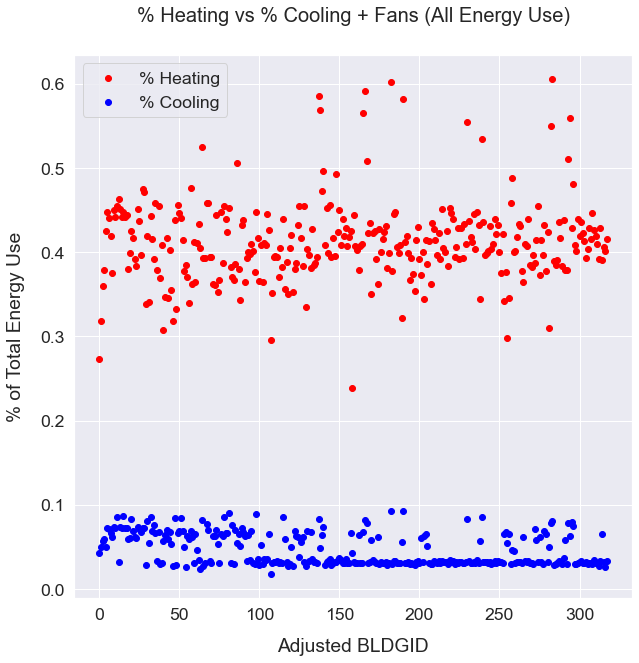

In [7]:
fig3 = plt.figure(figsize=(10,10))

p3_heat = plt.scatter(buildings.index, buildings['% Heating (All Energy Use)'], c='red')
p3_cool = plt.scatter(buildings.index, buildings['% Cooling + Fans (All Energy Use)'], c='blue')
plt.title('% Heating vs % Cooling + Fans (All Energy Use)',fontsize=20, y=1.05)
plt.xlabel('Adjusted BLDGID', labelpad=15)
plt.ylabel('% of Total Energy Use', labelpad=15)
plt.legend((p3_heat, p3_cool), ('% Heating', '% Cooling'))
plt.show()

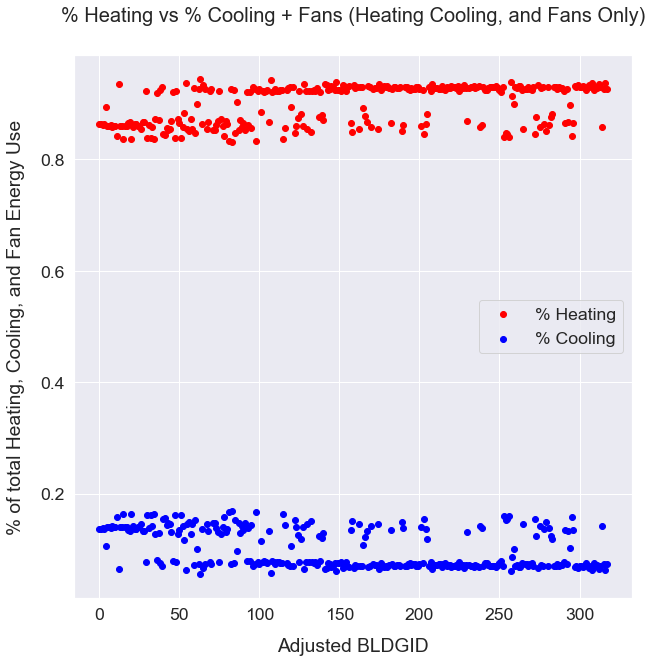

In [8]:
fig4 = plt.figure(figsize=(10,10))

p4_heat = plt.scatter(buildings.index, buildings['% Heating (Heating Cooling, and Fans Only)'], c='red')
p4_cool = plt.scatter(buildings.index, buildings['% Cooling + Fans (Heating Cooling, and Fans Only)'], c='blue')
plt.title('% Heating vs % Cooling + Fans (Heating Cooling, and Fans Only)', fontsize=20, y=1.05)
plt.xlabel('Adjusted BLDGID', labelpad=15)
plt.ylabel('% of total Heating, Cooling, and Fan Energy Use', labelpad=15)
plt.legend((p4_heat, p4_cool), ('% Heating', '% Cooling'))
plt.show()

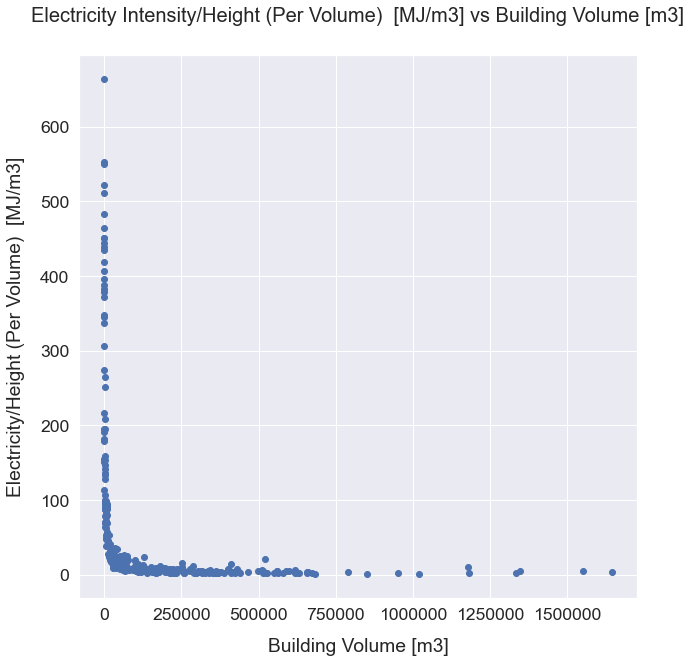

In [9]:
fig5 = plt.figure(figsize=(10,10))

plt.scatter(buildings['Volume [m3]'], buildings['Electricity Intensity/Height (Per Volume)  [MJ/m3]'])
plt.title('Electricity Intensity/Height (Per Volume)  [MJ/m3] vs Building Volume [m3]', fontsize=20, y=1.05)
plt.xlabel('Building Volume [m3]', labelpad=15)
plt.ylabel('Electricity/Height (Per Volume)  [MJ/m3]', labelpad=15)
plt.ticklabel_format(style='plain')
plt.show()

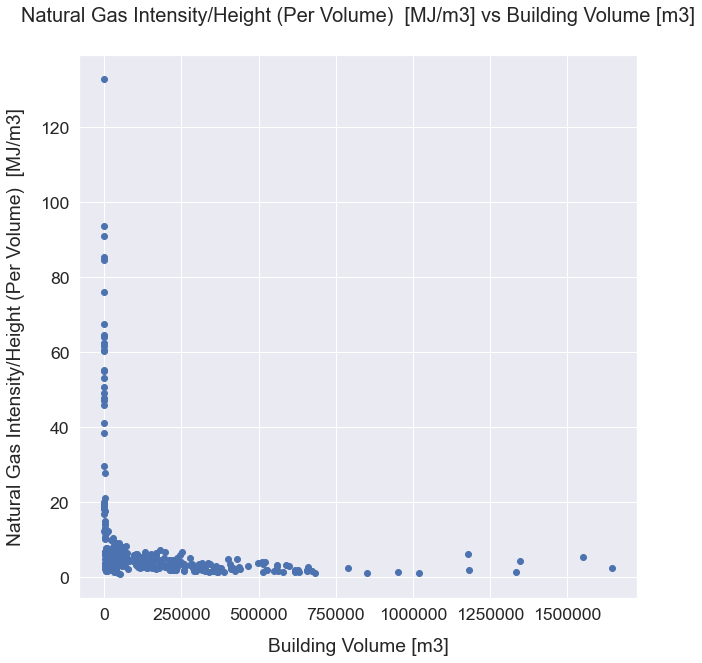

In [10]:
fig6 = plt.figure(figsize=(10,10))

plt.scatter(buildings['Volume [m3]'], buildings['Natural Gas Intensity/Height (Per Volume)  [MJ/m3]'])
plt.title('Natural Gas Intensity/Height (Per Volume)  [MJ/m3] vs Building Volume [m3]', fontsize=20, y=1.05)
plt.xlabel('Building Volume [m3]',labelpad=15)
plt.ylabel('Natural Gas Intensity/Height (Per Volume)  [MJ/m3]', labelpad=15)
plt.ticklabel_format(style='plain')
plt.show()

## Normalized Weather EUI

In [11]:
eui = pd.read_excel('./processed_data/EUI.xlsx')
eui.head()

,Building ID,Area [m2],Total Annual Electricity [GJ],Total Annual Gas [GJ],Total Energy Use (kWh),Total Heating/Cooling Days,Heating Days,Cooling Days,(Real) Heating Days,(Real) Cooling Days,Normalized Weather EUI,Heating Energy [GJ],Cooling Energy [GJ],Heating Energy / Heating Day,Cooling Energy / Cooling Day
0,153,111.81,268.67,40.29,85822.9088,5757.698,5422.585907,335.112038,205,49,14.905768,114.62,18.88,0.559122,0.385306
1,11851,122.03,252.20,40.35,81264.5390,5757.355,5433.920522,323.434409,205,49,14.114909,100.18,15.32,0.488683,0.312653
2,5914,134.91,203.98,40.84,68006.0996,5783.886,5453.387813,330.497695,205,49,11.757856,58.49,8.06,0.285317,0.164490
3,12377,139.38,260.05,40.33,83439.5564,5772.849,5448.745771,324.103683,205,49,14.453792,103.68,15.56,0.505756,0.317551
4,8495,139.96,243.94,40.42,78989.5208,5785.640,5455.514336,330.125548,205,49,13.652685,91.43,12.37,0.446000,0.252449


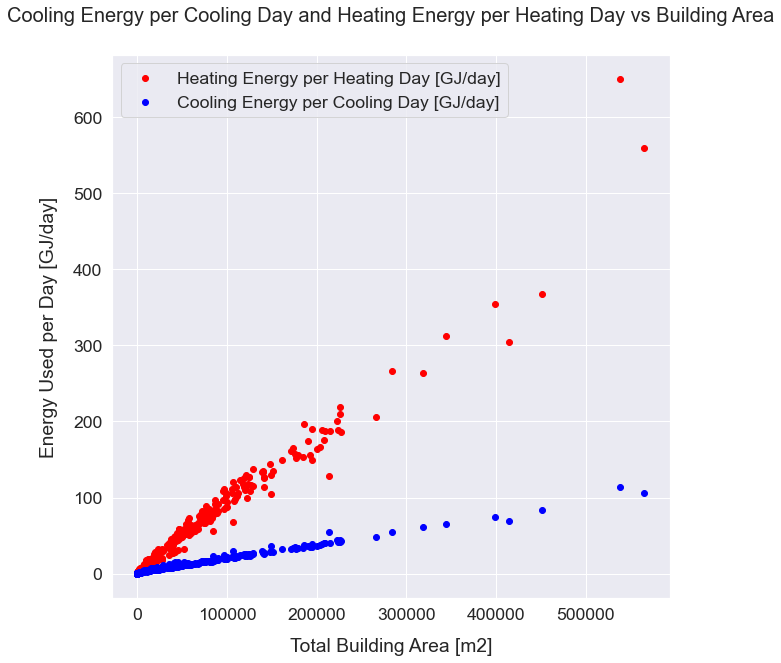

In [12]:
fig7 = plt.figure(figsize=(10,10))

p7_heat = plt.scatter(eui['Area [m2]'], eui['Heating Energy / Heating Day'], c='red')
p7_cool = plt.scatter(eui['Area [m2]'], eui['Cooling Energy / Cooling Day'], c='blue')
plt.title('Cooling Energy per Cooling Day and Heating Energy per Heating Day vs Building Area', fontsize=20, y=1.05)
plt.xlabel('Total Building Area [m2]', labelpad=15)
plt.ylabel('Energy Used per Day [GJ/day]', labelpad=15)
plt.legend((p7_heat, p7_cool), ('Heating Energy per Heating Day [GJ/day]', 'Cooling Energy per Cooling Day [GJ/day]'))
plt.show()

## Maps

In [13]:
%cd ".\phil_notebook\Data\" 

footprint = gpd.read_file('bldgs_ChicagoLoopLi213Merge0204.geojson') # Read in Footprints from website
# website used to create geojson -https://geojson.io/

nomorph = pd.read_csv("NoMorph_NEW2.csv") # Read in No Morph dataset
OG_data = pd.read_csv("chi0_90m_coord2bldg_smc.csv") # Read in original challenge data

c:\globus\Team-Big-Duck-Energy-SMCDC-2020-Impacts-of-Urban-Weather-on-Building-Energy-Use\phil_notebook\Data


In [14]:
UID = nomorph.BLDGID.unique() # Get all unique building IDs
UID = UID.tolist() # Turn it into a list

footprint_idx = footprint.BLDGID.isin(UID)
footprint_min = footprint[footprint_idx] 

nomorph_select = nomorph[['BLDGID','Area','Heat_rejection','HVAC_Elec_Intensity', 'HVAC_Ngas_Intensity','Total_Elec','Total_NatG','Total_Elec_Intensity','Total_NatG_Intensity']]
footprint_select = footprint_min[['BLDGID','HGT_AGL','Shape_Area','geometry']]

nomorph_select = nomorph_select.drop_duplicates(subset='BLDGID', keep='first') # Remove duplicates buildings from NoMORPH

mergedData = pd.merge(footprint_select, nomorph_select, on=['BLDGID'], how='inner') # merge data

In [15]:
# Load initial visualization

#Height

map_1 = KeplerGl(height=500,config=config.map_1)
map_1.add_data(OG_data, name= "Points")
map_1.add_data(mergedData, name= "Footprint")

map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'xdkpd8h', 'type': …

In [16]:
# Load initial visualization

#Heat Rejection

map_2 = KeplerGl(height=500, config=config.map_2)
map_2.add_data(mergedData, name= "Footprint")

map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '6301vji', 'type': …

In [17]:
# Load initial visualization
#Electricity Consumption
map_2 = KeplerGl(height=500, config=config.map_22)
map_2.add_data(mergedData, name= "Footprint")

map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ct668wo', 'type': …

In [18]:
# Load initial visualization
#Gas Consumption
map_3 = KeplerGl(height=500, config=config.map_3)
map_3.add_data(mergedData, name= "Footprint")

map_3

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '7sywi1in', 'type':…

In [19]:
# Load initial visualization
#Electricity Intensity 
map_4 = KeplerGl(height=500, config=config.map_4)
map_4.add_data(mergedData, name= "Footprint")

map_4

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['Footprint'], 'id': 'abpby13…

In [20]:
# Load initial visualization
#Gas Intensity
map_5 = KeplerGl(height=500, config=config.map_5)
map_5.add_data(mergedData, name= "Footprint")

map_5

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'f6xkk9g', 'type': …

## Correlations

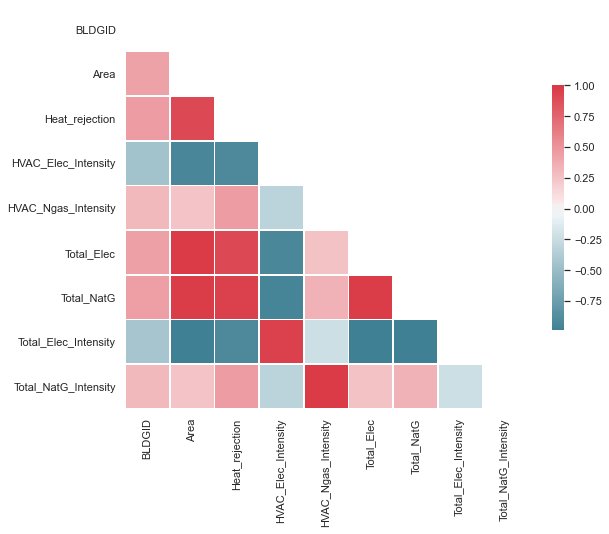

In [21]:
sns.set(style="white") # set style
d = nomorph_select # set data

# Compute the correlation matrix
corr = d.corr(method='spearman')
#corr = d.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,BLDGID,Area,Heat_rejection,HVAC_Elec_Intensity,HVAC_Ngas_Intensity,Total_Elec,Total_NatG,Total_Elec_Intensity,Total_NatG_Intensity
BLDGID,1.00,0.43,0.46,-0.45,0.31,0.43,0.45,-0.43,0.31
Area,0.43,1.00,0.91,-0.93,0.25,1.00,0.98,-0.99,0.25
Heat_rejection,0.46,0.91,1.00,-0.91,0.46,0.91,0.95,-0.91,0.46
HVAC_Elec_Intensity,-0.45,-0.93,-0.91,1.00,-0.31,-0.93,-0.95,0.95,-0.31
HVAC_Ngas_Intensity,0.31,0.25,0.46,-0.31,1.00,0.26,0.35,-0.22,1.00
Total_Elec,0.43,1.00,0.91,-0.93,0.26,1.00,0.98,-0.98,0.26
Total_NatG,0.45,0.98,0.95,-0.95,0.35,0.98,1.00,-0.98,0.35
Total_Elec_Intensity,-0.43,-0.99,-0.91,0.95,-0.22,-0.98,-0.98,1.00,-0.22
Total_NatG_Intensity,0.31,0.25,0.46,-0.31,1.00,0.26,0.35,-0.22,1.00


## Spacial Correlations

In [23]:
mergedData2 = pd.merge(mergedData, OG_data, on=['BLDGID'], how='inner') # merge data to include Lat and Loc.

In [24]:
mergedData2['Log_TElec']=np.log(mergedData2.Total_Elec)
mergedData2['Log_TGas']=np.log(mergedData2.Total_NatG)
mergedData2['Log_Area']=np.log(mergedData2.Area)
mergedData2['Log_IElec']=np.log(mergedData2.Total_Elec_Intensity)
mergedData2['Log_IGas']=np.log(mergedData2.Total_NatG_Intensity)
mergedData2['Log_HGT']=np.log(mergedData2.HGT_AGL)

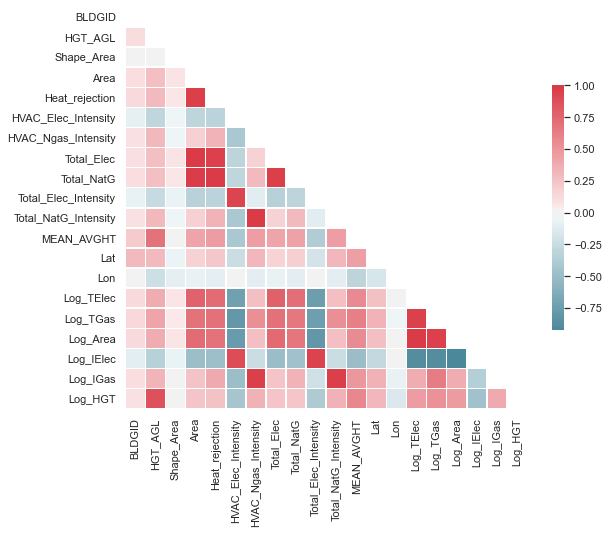

In [25]:
sns.set(style="white") # set style
d = mergedData2 # set data

# Compute the correlation matrix
corr = d.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,BLDGID,HGT_AGL,Shape_Area,Area,Heat_rejection,HVAC_Elec_Intensity,HVAC_Ngas_Intensity,Total_Elec,Total_NatG,Total_Elec_Intensity,Total_NatG_Intensity,MEAN_AVGHT,Lat,Lon,Log_TElec,Log_TGas,Log_Area,Log_IElec,Log_IGas,Log_HGT
BLDGID,1.00,0.12,0.01,0.11,0.12,-0.08,0.10,0.10,0.11,-0.07,0.10,0.21,0.29,0.03,0.13,0.14,0.13,-0.11,0.11,0.09
HGT_AGL,0.12,1.00,0.01,0.27,0.30,-0.29,0.31,0.27,0.28,-0.26,0.31,0.69,0.30,-0.22,0.38,0.42,0.38,-0.34,0.33,0.87
Shape_Area,0.01,0.01,1.00,0.08,0.06,-0.04,-0.04,0.08,0.06,-0.06,-0.04,-0.01,-0.05,-0.09,0.07,0.05,0.07,-0.07,-0.03,-0.00
Area,0.11,0.27,0.08,1.00,0.96,-0.30,0.18,1.00,0.97,-0.33,0.18,0.43,0.18,-0.07,0.77,0.69,0.73,-0.49,0.25,0.24
Heat_rejection,0.12,0.30,0.06,0.96,1.00,-0.32,0.34,0.96,0.99,-0.32,0.34,0.46,0.23,-0.09,0.73,0.70,0.69,-0.47,0.39,0.26
HVAC_Elec_Intensity,-0.08,-0.29,-0.04,-0.30,-0.32,1.00,-0.41,-0.30,-0.29,0.93,-0.41,-0.41,-0.24,-0.00,-0.72,-0.79,-0.77,0.90,-0.48,-0.43
HVAC_Ngas_Intensity,0.10,0.31,-0.04,0.18,0.34,-0.41,1.00,0.18,0.29,-0.12,1.00,0.46,0.32,-0.10,0.27,0.53,0.27,-0.24,0.97,0.35
Total_Elec,0.10,0.27,0.08,1.00,0.96,-0.30,0.18,1.00,0.97,-0.34,0.18,0.42,0.17,-0.07,0.78,0.70,0.74,-0.49,0.24,0.25
Total_NatG,0.11,0.28,0.06,0.97,0.99,-0.29,0.29,0.97,1.00,-0.30,0.29,0.43,0.19,-0.10,0.71,0.67,0.67,-0.45,0.34,0.23
Total_Elec_Intensity,-0.07,-0.26,-0.06,-0.33,-0.32,0.93,-0.12,-0.34,-0.30,1.00,-0.12,-0.37,-0.19,-0.01,-0.75,-0.73,-0.80,0.94,-0.20,-0.39


In [27]:
w_LOC = pysal.lib.weights.KNN.from_dataframe(mergedData2,k=10)
local_morans = pysal.explore.esda.moran.Moran_Local(mergedData2.Total_Elec,w_LOC,permutations=99999)

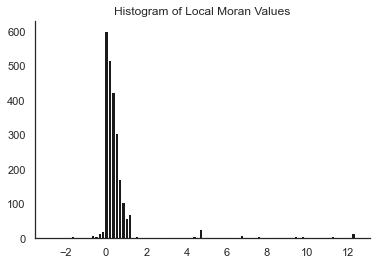

In [28]:
plt.hist(local_morans.Is, color='k',bins=90)    
sns.despine()   
plt.title("Histogram of Local Moran Values")  
plt.show()

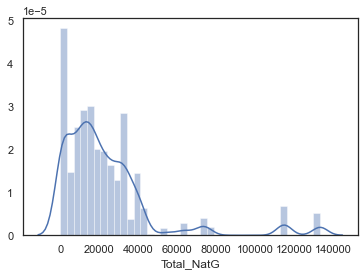

In [29]:
sns.distplot(mergedData2.Total_NatG);

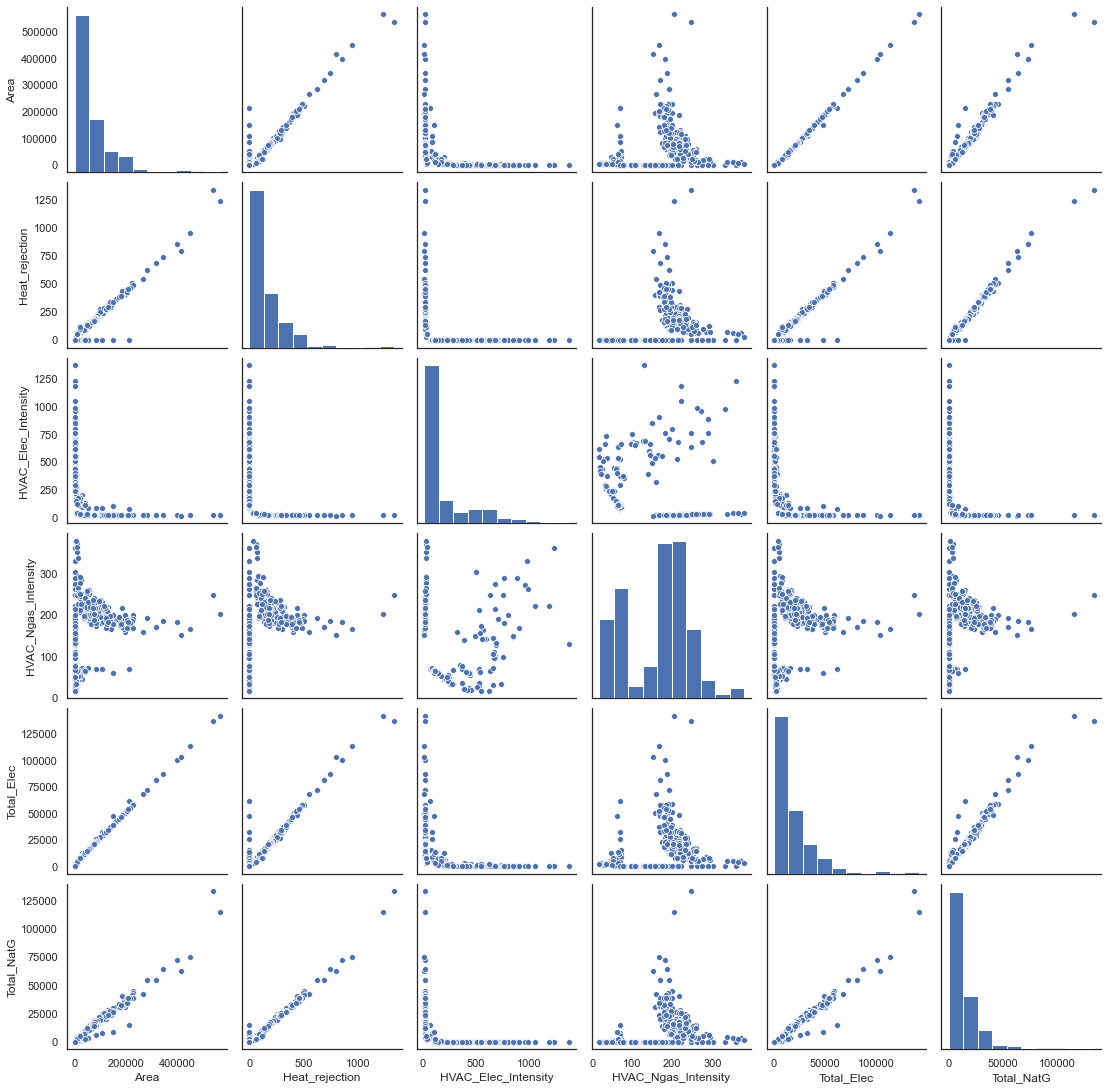

In [30]:
sns.pairplot(nomorph_select[['Area', 'Heat_rejection', 'HVAC_Elec_Intensity',
       'HVAC_Ngas_Intensity', 'Total_Elec', 'Total_NatG']])